# Logistic Regression

## 1. Predicting a continuous response
- Using linear regression model

In [2]:
# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort('al', inplace=True)
glass.head()

C:\Users\student\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


In [3]:
# examine glass_type
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [5]:
# 크게 class를 2개로 둬서 binary classification 문제로 바꿔서 풀어보자.
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0


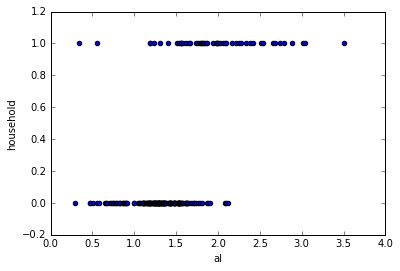

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

In [7]:
# fit a linear regression model and store the predictions
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

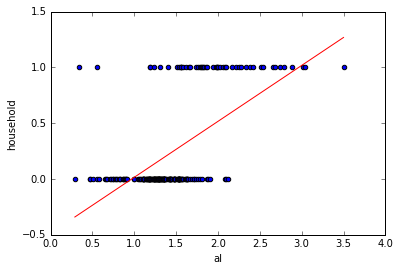

In [8]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

## 2. Predicting a categorical response
- Using logistic regression

In [9]:
# transform household_pred to 1 or 0
import numpy as np
glass['household_pared_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pared_class
id,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,-0.230236,0


In [11]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

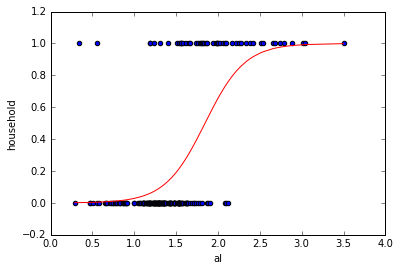

In [12]:
# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

# plot the predicted probabilities
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [13]:
# examine some example predictions
print(logreg.predict_proba(1))
print(logreg.predict_proba(2))
print(logreg.predict_proba(3))

[[ 0.97161726  0.02838274]]
[[ 0.34361555  0.65638445]]
[[ 0.00794192  0.99205808]]


The first column indicates the predicted probability of **class 0**, and the second column indicates the predicted probability of **class 1**.

## 3. Iris data classification

- 구글에서 iris data 검색

In [15]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [21]:
print (iris.data)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

Splitting data into 70% training and 30% test data:

In [22]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

Standardizing the features:

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

Training a logistic regression model with scikit-learn

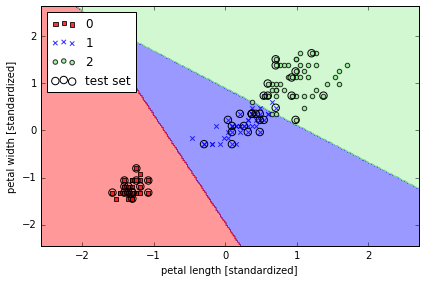

In [23]:
from sklearn.linear_model import LogisticRegression

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)


plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()

In [24]:
lr.predict_proba(X_test_std[0, :])

C:\Users\student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

# 4. Classification with TItanic dataset
- Data from Kaggle's Titanic competition: [data](https://github.com/justmarkham/DAT8/blob/master/data/titanic.csv), [data dictionary](https://www.kaggle.com/c/titanic/data)
- **Goal**: Predict survival based on passenger characteristics
- `titanic.csv` is already in our repo, so there is no need to download the data from the Kaggle website

In [25]:
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
print(list(zip(feature_cols, logreg.coef_[0])))

[('Pclass', -0.88188860564507288), ('Parch', 0.34239215857498628)]


In [28]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test)

In [29]:
# calculate classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.668161434978


# 5. How to evaluate the classification model

- 분류 문제를 풀 때, confusion matrix를 보는게 중요하다
- confusion matrix의 순서 잘 확인할 것
- ///  0 1
- 0 TN FP
- 1 FN TP

In [30]:
# print confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[105  23]
 [ 51  44]]


In [31]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [32]:
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 44
True Negatives: 105
False Positives: 23
False Negatives: 51


In [33]:
# calculate the sensitivity
print('Sensitivity:', TP / float(TP + FN))

Sensitivity: 0.463157894737


In [34]:
# calculate the specificity
print('Specificity:', TN / float(TN + FP))

Specificity: 0.8203125


sensititvy와 specitivity를 기하평균을 낼 수도 있다. (서로 밸런싱) 

In [42]:
logreg.predict_proba(X_test)

array([[ 0.39135327,  0.60864673],
       [ 0.78953917,  0.21046083],
       [ 0.60832128,  0.39167872],
       [ 0.78953917,  0.21046083],
       [ 0.43917202,  0.56082798],
       [ 0.78953917,  0.21046083],
       [ 0.43917202,  0.56082798],
       [ 0.39135327,  0.60864673],
       [ 0.39135327,  0.60864673],
       [ 0.78953917,  0.21046083],
       [ 0.78953917,  0.21046083],
       [ 0.78953917,  0.21046083],
       [ 0.39135327,  0.60864673],
       [ 0.60832128,  0.39167872],
       [ 0.78953917,  0.21046083],
       [ 0.39135327,  0.60864673],
       [ 0.6541577 ,  0.3458423 ],
       [ 0.78953917,  0.21046083],
       [ 0.78953917,  0.21046083],
       [ 0.35734296,  0.64265704],
       [ 0.78953917,  0.21046083],
       [ 0.78953917,  0.21046083],
       [ 0.39135327,  0.60864673],
       [ 0.60832128,  0.39167872],
       [ 0.78953917,  0.21046083],
       [ 0.78953917,  0.21046083],
       [ 0.24482392,  0.75517608],
       [ 0.60832128,  0.39167872],
       [ 0.60832128,

In [43]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

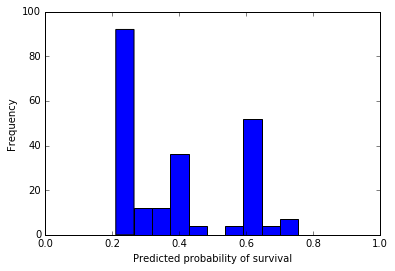

In [44]:
# histogram of predicted probabilities
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [45]:
# increase sensitivity by lowering the threshold for predicting survival
y_pred_class = np.where(y_pred_prob > 0.3, 1, 0)

In [46]:
# old confusion matrix
print(confusion)

[[105  23]
 [ 51  44]]


In [47]:
confusion_new = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_new)

[[72 56]
 [32 63]]


In [48]:
# new sensitivity (higher than before)
print(63 / float(63 + 32))

0.6631578947368421


In [49]:
# new specificity (lower than before)
print(72 / float(72 + 56))

0.5625
